In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os
import datetime
import shutil

In [3]:
train_data = pd.read_csv("dataset/image_classification/pokemon/pokemon.csv")
train_data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [4]:
train_data.isna().sum()

Name       0
Type1      0
Type2    404
dtype: int64

In [5]:
train_data.drop("Type2", axis = 1, inplace=True)

In [6]:
types_to_keep = ["Grass", "Fire", "Water"]
train_data = train_data[train_data["Type1"].isin(types_to_keep)]
train_data["Type1"].value_counts()

Type1
Water    114
Grass     78
Fire      53
Name: count, dtype: int64

In [7]:
train_data.head()

,Name,Type1
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire


In [8]:
class_name = train_data.Type1.unique()

In [9]:
len(class_name)

3

In [10]:
img = train_data["Name"].to_numpy()
labels = np.array(pd.factorize(train_data["Type1"])[0])

In [11]:
img_path = "dataset/image_classification/pokemon/images/images/"

In [12]:
filenames = os.listdir(img_path)
filenames

['abomasnow.png',
 'abra.png',
 'absol.png',
 'accelgor.png',
 'aegislash-blade.png',
 'aerodactyl.png',
 'aggron.png',
 'aipom.png',
 'alakazam.png',
 'alomomola.png',
 'altaria.png',
 'amaura.png',
 'ambipom.png',
 'amoonguss.png',
 'ampharos.png',
 'anorith.png',
 'araquanid.jpg',
 'arbok.png',
 'arcanine.png',
 'arceus.png',
 'archen.png',
 'archeops.png',
 'ariados.png',
 'armaldo.png',
 'aromatisse.png',
 'aron.png',
 'articuno.png',
 'audino.png',
 'aurorus.png',
 'avalugg.png',
 'axew.png',
 'azelf.png',
 'azumarill.png',
 'azurill.png',
 'bagon.png',
 'baltoy.png',
 'banette.png',
 'barbaracle.png',
 'barboach.png',
 'basculin-red-striped.png',
 'bastiodon.png',
 'bayleef.png',
 'beartic.png',
 'beautifly.png',
 'beedrill.png',
 'beheeyem.png',
 'beldum.png',
 'bellossom.png',
 'bellsprout.png',
 'bergmite.png',
 'bewear.jpg',
 'bibarel.png',
 'bidoof.png',
 'binacle.png',
 'bisharp.png',
 'blacephalon.jpg',
 'blastoise.png',
 'blaziken.png',
 'blissey.png',
 'blitzle.png',
 '

In [13]:
filenames[0].split(".")[0]

'abomasnow'

In [14]:
img_filepath = []
for i in img:
    for filename in os.listdir(img_path):
        if i == filename.split(".")[0]:
            img_filepath.append(os.path.join(img_path, filename))

In [15]:
img_filepath[0]

'dataset/image_classification/pokemon/images/images/bulbasaur.png'

In [16]:
labels[0]

0

In [17]:
labels_one_hot = tf.one_hot(labels, depth=len(class_name))

In [18]:
class_name[np.argmax(labels_one_hot[0])]

'Grass'

In [19]:
len(labels_one_hot), len(img_filepath)

(245, 245)

In [20]:
labels[:3]

array([0, 0, 0], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_img, val_img, train_label, val_label = train_test_split(img_filepath, 
                                                              labels, 
                                                              test_size=0.2, 
                                                              random_state=42)

In [23]:
len(train_img), len(val_img), len(train_label), len(val_label)

(196, 49, 196, 49)

In [24]:
tf.reduce_max(train_label), tf.reduce_min(train_label)

(<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [26]:
pd.DataFrame(train_label).value_counts()

2    88
0    67
1    41
Name: count, dtype: int64

In [27]:
img_filepath[88], class_name[labels[88]]

('dataset/image_classification/pokemon/images/images/grovyle.png', 'Grass')

In [28]:
img_shape = 104

In [29]:
def load_preprocess_image(image_name, label):
    image = tf.io.read_file(image_name)
    
    # Extract the file extension using tf.strings.split
    file_extension = tf.strings.split(image_name, sep=".")[-1]

    # Check the file extension
    is_png = tf.math.equal(file_extension, "png")

    # Decode the image based on the file extension
    image = tf.cond(is_png,
                    lambda: tf.image.decode_png(image, channels=3),
                    lambda: tf.image.decode_jpeg(image, channels=3))
    
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.image.resize(image, size=[img_shape, img_shape])
    return image, label

In [30]:
img_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(img_shape, img_shape)
])

In [31]:
train_img[0]

'dataset/image_classification/pokemon/images/images/dewpider.jpg'

In [32]:
sample_img, sample_label = load_preprocess_image(train_img[15], train_label[15])
sample_img, sample_label

(<tf.Tensor: shape=(104, 104, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [33]:
sample_aug_img = tf.squeeze(img_augmentation(tf.expand_dims(sample_img, axis=0)))
sample_aug_img

<tf.Tensor: shape=(104, 104, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

(-0.5, 103.5, 103.5, -0.5)

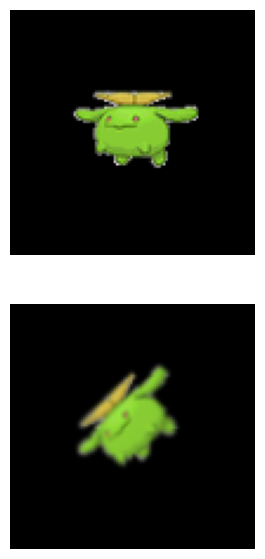

In [34]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.imshow(sample_img)
plt.axis(False)
plt.subplot(2,1,2)
plt.imshow(sample_aug_img)
plt.axis(False)

In [35]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

def tensorboard(model_name):
    return tf.keras.callbacks.TensorBoard(os.path.join("model_logs/pokemon/", model_name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))
    
def checkpoint(model_name):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join("h5_models/pokemon/", model_name + ".h5"), save_best_only=True, monitor="val_loss")

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_img, train_label)).map(map_func=load_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_img, val_label)).map(map_func=load_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

In [37]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 104, 104, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [38]:
val_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 104, 104, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [39]:
INPUT_SHAPE = (104, 104, 3)

In [41]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = img_augmentation(inputs, training=True)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(len(class_name), activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

model_1_init_weights = model_1.get_weights()

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=50,
                              callbacks=[tensorboard(model_1.name),
                                         checkpoint(model_1.name),
                                         early_stopping])

Epoch 1/50
13/13 [==============================] - 2s 57ms/step - loss: 1.0901 - accuracy: 0.3929 - val_loss: 1.0023 - val_accuracy: 0.5918
Epoch 2/50
13/13 [==============================] - 0s 28ms/step - loss: 0.9965 - accuracy: 0.4745 - val_loss: 0.8099 - val_accuracy: 0.6327
Epoch 3/50
13/13 [==============================] - 0s 27ms/step - loss: 0.8905 - accuracy: 0.5255 - val_loss: 0.6944 - val_accuracy: 0.6531
Epoch 4/50
13/13 [==============================] - 0s 24ms/step - loss: 0.8262 - accuracy: 0.5408 - val_loss: 0.7606 - val_accuracy: 0.5714
Epoch 5/50
13/13 [==============================] - 0s 23ms/step - loss: 0.8204 - accuracy: 0.5510 - val_loss: 0.7376 - val_accuracy: 0.6327
Epoch 6/50
13/13 [==============================] - 0s 26ms/step - loss: 0.7824 - accuracy: 0.6173 - val_loss: 0.6610 - val_accuracy: 0.6735
Epoch 7/50
13/13 [==============================] - 0s 23ms/step - loss: 0.7166 - accuracy: 0.6837 - val_loss: 0.6901 - val_accuracy: 0.6735
Epoch 8/50
13

In [42]:
tf.keras.backend.clear_session()

inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = img_augmentation(inputs, training=True)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(len(class_name), activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

model_2_init_weights = model_1.get_weights()

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2_history = model_2.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=50,
                              callbacks=[tensorboard(model_2.name),
                                         checkpoint(model_2.name),
                                         early_stopping])

Epoch 1/50
13/13 [==============================] - 2s 93ms/step - loss: 1.0719 - accuracy: 0.4643 - val_loss: 0.9609 - val_accuracy: 0.5306
Epoch 2/50
13/13 [==============================] - 1s 50ms/step - loss: 0.9446 - accuracy: 0.4694 - val_loss: 0.7402 - val_accuracy: 0.7551
Epoch 3/50
13/13 [==============================] - 1s 42ms/step - loss: 0.9364 - accuracy: 0.5306 - val_loss: 0.7870 - val_accuracy: 0.7143
Epoch 4/50
13/13 [==============================] - 1s 47ms/step - loss: 0.8630 - accuracy: 0.5663 - val_loss: 0.5769 - val_accuracy: 0.7347
Epoch 5/50
13/13 [==============================] - 1s 47ms/step - loss: 0.7881 - accuracy: 0.6327 - val_loss: 0.5738 - val_accuracy: 0.7143
Epoch 6/50
13/13 [==============================] - 1s 42ms/step - loss: 0.7430 - accuracy: 0.6582 - val_loss: 0.5934 - val_accuracy: 0.7959
Epoch 7/50
13/13 [==============================] - 1s 42ms/step - loss: 0.7182 - accuracy: 0.7194 - val_loss: 0.6261 - val_accuracy: 0.7143
Epoch 8/50
13

In [43]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 104, 104, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 104, 104, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 102, 102, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 10)        910       
                                                           

In [44]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 104, 104, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 104, 104, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 102, 102, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 51, 51, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                       

In [45]:
%load_ext tensorboard

In [46]:
%tensorboard --logdir model_logs/pokemon --port 8082